In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')
matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
deliveries.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Q1

In [4]:
rcb_dc=matches[((matches.team1=='Royal Challengers Bangalore') | (matches.team2=='Royal Challengers Bangalore')) & ((matches.team1=='Delhi Capitals') | (matches.team2=='Delhi Capitals'))].copy()
rcb=matches[(matches.team1=='Royal Challengers Bangalore') | (matches.team2=='Royal Challengers Bangalore')].copy()
dc=matches[(matches.team1=='Delhi Capitals') | (matches.team2=='Delhi Capitals')].copy()
rcb_dc.shape,rcb.shape,dc.shape

((23, 18), (180, 18), (177, 18))

In [5]:
rcb_dcdeli=deliveries[((deliveries.batting_team=='Royal Challengers Bangalore') | (deliveries.bowling_team=='Royal Challengers Bangalore')) & ((deliveries.batting_team=='Delhi Capitals') | (deliveries.bowling_team=='Delhi Capitals'))].copy()
rcbdeli=deliveries[(deliveries.batting_team=='Royal Challengers Bangalore') | (deliveries.bowling_team=='Royal Challengers Bangalore')].copy()
dcdeli=deliveries[(deliveries.batting_team=='Delhi Capitals') | (deliveries.bowling_team=='Delhi Capitals')].copy()
rcb_dcdeli.shape,rcbdeli.shape,dcdeli.shape

((5443, 21), (42144, 21), (41383, 21))

In [6]:
rcb_dc.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
54,55,2017,Delhi,2017-05-14,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,10,0,HV Patel,Feroz Shah Kotla,CK Nandan,C Shamshuddin,NaN
75,76,2008,Delhi,2008-04-30,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Capitals,10,0,GD McGrath,Feroz Shah Kotla,Aleem Dar,I Shivram,NaN
103,104,2008,Bangalore,2008-05-19,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,SP Goswami,M Chinnaswamy Stadium,SJ Davis,GA Pratapkumar,NaN
128,129,2009,Port Elizabeth,2009-04-26,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Delhi Capitals,0,6,TM Dilshan,St George's Park,S Asnani,BG Jerling,NaN


In [7]:
rcb.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
16,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,NaN


In [8]:
dc.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
17,18,2017,Delhi,2017-04-17,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,bat,normal,0,Kolkata Knight Riders,0,4,NM Coulter-Nile,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN


In [9]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],colors=['lightblue','violet'],autopct='%2.f%%')
        ax[i].set_title(columns[i])

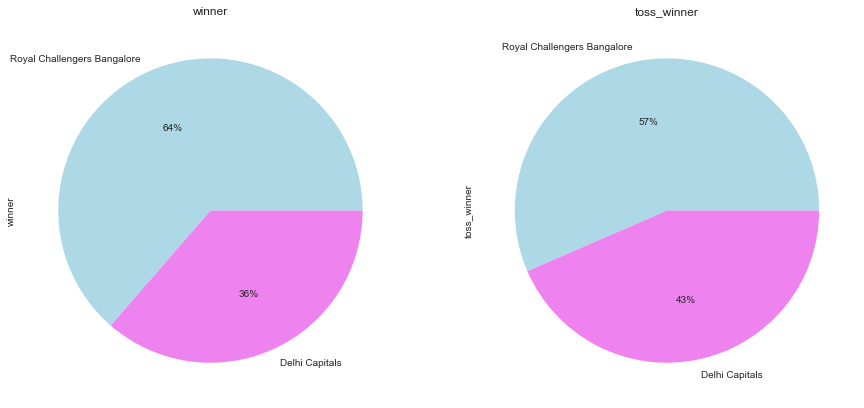

In [10]:
cat_plot(rcb_dc,['winner','toss_winner'],(15,8),'pie')


In [11]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='orchid')
        ax[i].set_title(columns[i])
        

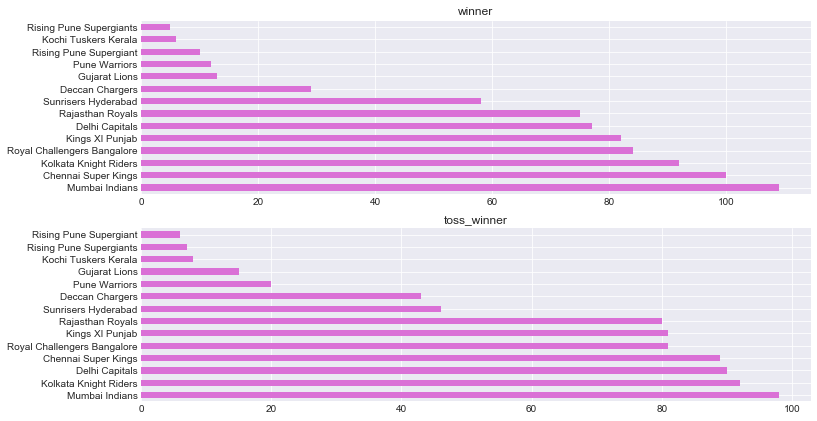

In [12]:
cat_plot(matches,['winner','toss_winner'],(12,7),'barh')


### We can observe from the above analysis that RCB will be the winner

# Q2


In [13]:
boundaries=rcb_dcdeli.query('batsman_runs>=4').groupby(['match_id','batsman']).batsman_runs.count()
boundaries

match_id  batsman      
5         AP Tare           3
          CH Gayle          1
          KK Nair           1
          KM Jadhav        10
          Mandeep Singh     3
                           ..
11337     S Dhawan          7
          S Dube            2
          S Rutherford      5
          SS Iyer           5
          V Kohli           3
Name: batsman_runs, Length: 234, dtype: int64

In [14]:
strike_rate=rcb_dcdeli.groupby(['match_id','batsman',],as_index=False).agg({'ball':'count',
                                                 'batsman_runs':'sum'})
strike_rate=strike_rate.query('ball>10')
strike_rate

,match_id,batsman,ball,batsman_runs
0,5,A Mishra,14,8
1,5,AP Tare,18,18
7,5,KM Jadhav,38,69
11,5,RR Pant,39,57
13,5,SR Watson,25,24
...,...,...,...,...
336,11337,S Dhawan,38,52
337,11337,S Dube,16,24
338,11337,S Rutherford,13,32
339,11337,SS Iyer,37,52


In [15]:
strike_rate=strike_rate.merge(boundaries,on=['match_id','batsman'])
strike_rate.rename({'batsman_runs_y':'boundaries_count'}, inplace=True,axis=1)
strike_rate.rename({'batsman_runs_x':'batsman_runs'}, inplace=True,axis=1)

In [16]:
strike_rate

,match_id,batsman,ball,batsman_runs,boundaries_count
0,5,AP Tare,18,18,3
1,5,KM Jadhav,38,69,10
2,5,RR Pant,39,57,7
3,5,SR Watson,25,24,4
4,5,STR Binny,19,16,1
...,...,...,...,...,...
167,11337,S Dhawan,38,52,7
168,11337,S Dube,16,24,2
169,11337,S Rutherford,13,32,5
170,11337,SS Iyer,37,52,5


In [17]:
# strike_rate=strike_rate.drop('batsman_runs',axis=1)
strike_rate=strike_rate.query('boundaries_count>3').groupby(['match_id','batsman']).sum()
strike_rate

ball  batsman_runs  boundaries_count
match_id batsman                                           
5        KM Jadhav       38            69                10
         RR Pant         39            57                 7
         SR Watson       25            24                 4
55       CH Gayle        39            48                 6
         KK Nair         22            26                 5
...                     ...           ...               ...
11311    SS Iyer         55            73                10
11337    PA Patel        20            40                 8
         S Dhawan        38            52                 7
         S Rutherford    13            32                 5
         SS Iyer         37            52                 5

[94 rows x 3 columns]

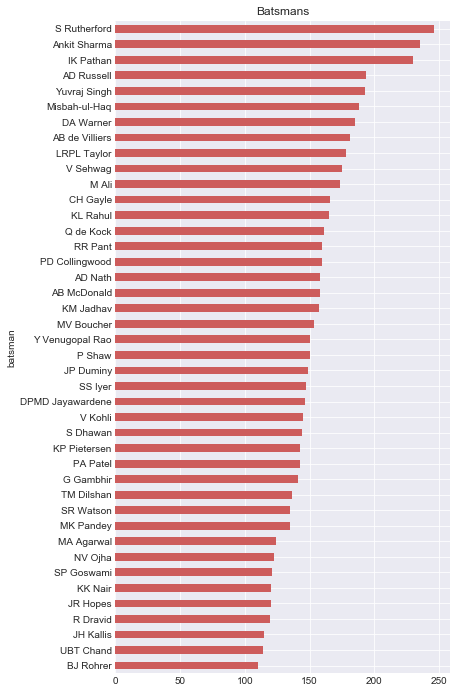

In [18]:
strike_rate['strikerate']=((strike_rate.batsman_runs/strike_rate.ball)*100)
strike_rate.groupby('batsman').mean().strikerate.sort_values(ascending=True).plot.barh(figsize=(6,12),
                                                                                          title='Batsmans',
                                                                                          color='indianred')

Text(0.5, 1.0, 'Frequency distribution of batsmen according to the Question restraints')

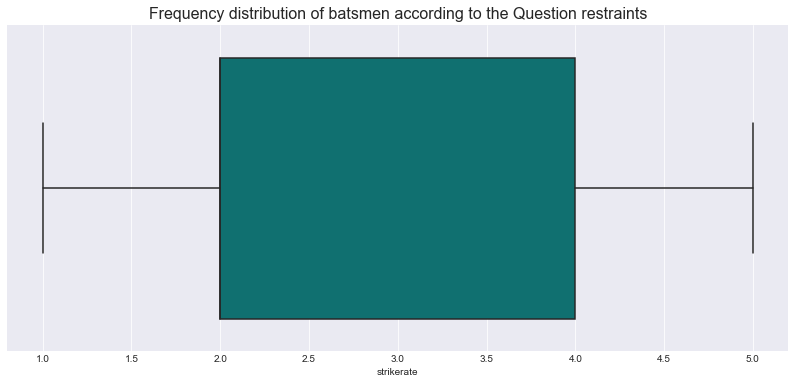

In [31]:
plt.figure(figsize=(14,6))
sns.boxplot(strike_rate.query('strikerate>130').groupby('match_id').count().strikerate,
            color='teal')
plt.title('Frequency distribution of batsmen according to the Question restraints',fontsize=16)

### As we can observe from the above distribution there likely to be 2-4 such batsmen in the match

# Q3

In [20]:
rabada_out=deliveries[deliveries.batsman=='K Rabada'].groupby(['match_id',
                                                               'over',
                                                               'ball'],as_index=False).count()
rabada_out

,match_id,over,ball,inning,batting_team,bowling_team,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,24,6,4,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
1,24,6,5,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
2,24,6,6,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
3,24,6,7,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
4,24,7,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,11325,19,7,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
79,11325,20,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
80,11325,20,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
81,11325,20,3,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0


In [21]:

def dismissal_counter():
    val=[]
    counter=0
    for i in rabada_out.dismissal_kind:
        if i==0:
            counter+=1
        else:
            val.append((counter,'out'))
            #val.append('out')
            counter=0
    return val



dismissal_counter()

[(41, 'out'), (20, 'out'), (4, 'out'), (0, 'out'), (3, 'out'), (9, 'out')]

In [22]:
arr=[]
for _ in dismissal_counter():
    arr.append(_[0])
arr=np.array(arr)
arr


array([41, 20,  4,  0,  3,  9])

Mean 12.833333333333334 	 Standard Deviation 14.13525930273497


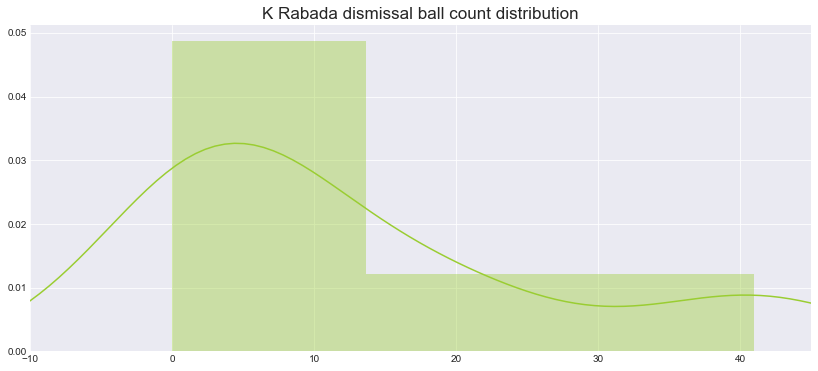

In [23]:
plt.figure(figsize=(14,6))
sns.distplot(arr,color='yellowgreen')
plt.title('K Rabada dismissal ball count distribution',fontsize=17)
plt.xlim([-10,45])
print('Mean',arr.mean(),'\t','Standard Deviation',arr.std())

### Observing the above graph we can say that K Rabada will get out within 7-12 balls

# Q4

In [24]:
dot_ball_count=rcb_dcdeli.query('batsman_runs==0').groupby(['match_id',
                                                            #'over',
                                                            'bowler',
                                                            #'ball',
                                                            ]).ball.count()
dot_ball_count

match_id  bowler           
5         A Mishra              3
          B Stanlake           13
          CH Morris            17
          CR Brathwaite         2
          Iqbal Abdulla         6
                               ..
11337     S Lamichhane          1
          S Rutherford          1
          UT Yadav              8
          Washington Sundar     6
          YS Chahal            10
Name: ball, Length: 263, dtype: int64

In [25]:
bowler_boundaries_count=rcb_dcdeli.query('batsman_runs>=4').groupby(['match_id',
                                                                    #'over',
                                                                    'bowler',
                                                                    #'ball',
                                                                    ]).batsman_runs.count()
bowler_boundaries_count

match_id  bowler           
5         A Mishra             5
          B Stanlake           4
          CH Morris            4
          CR Brathwaite        4
          Iqbal Abdulla        4
                              ..
11337     N Saini              9
          S Lamichhane         5
          UT Yadav             7
          Washington Sundar    3
          YS Chahal            6
Name: batsman_runs, Length: 249, dtype: int64

In [26]:
ecorate=rcb_dcdeli.groupby(['match_id',
                            'over',
                            'bowler',
                            'ball',
                            ]).agg({
                                    'batsman_runs':'sum',
                                    'bye_runs':'sum',
                                    'legbye_runs':'sum',
                                    'ball':'count'
                                     }).groupby(['match_id','bowler']).sum()

ecorate=ecorate.merge(bowler_boundaries_count,on=['match_id',
                                                  'bowler'],
                      suffixes=('','_bowler_boundaries_count'))
ecorate=ecorate.merge(dot_ball_count,on=['match_id',
                                         'bowler'],
                      suffixes=('','_dot_ball_count'))

ecorate=ecorate.query('batsman_runs_bowler_boundaries_count<4 & ball_dot_ball_count>8')
ecorate.head()

batsman_runs  bye_runs  legbye_runs  ball  \
match_id bowler                                                  
5        SR Watson             21         0            0    24   
         YS Chahal             19         0            1    24   
55       Avesh Khan            23         0            1    24   
         PJ Cummins            19         0            1    26   
         SR Watson             16         0            0    24   

                     batsman_runs_bowler_boundaries_count  ball_dot_ball_count  
match_id bowler                                                                 
5        SR Watson                                      2                   12  
         YS Chahal                                      1                   11  
55       Avesh Khan                                     3                   12  
         PJ Cummins                                     1                   12  
         SR Watson                                      1                   11

In [27]:
ecorate['eco_rate']=((ecorate.batsman_runs-(ecorate.bye_runs+ecorate.legbye_runs))/ecorate.ball)*6
eco_rate_count=ecorate.query('eco_rate<8').groupby('match_id').eco_rate.count()
eco_rate_count.describe()

count    20.000000
mean      2.450000
std       1.356272
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       5.000000
Name: eco_rate, dtype: float64

Text(0.5, 1.0, 'Frequency Distribution of bowlers who have an economy rate less than 8')

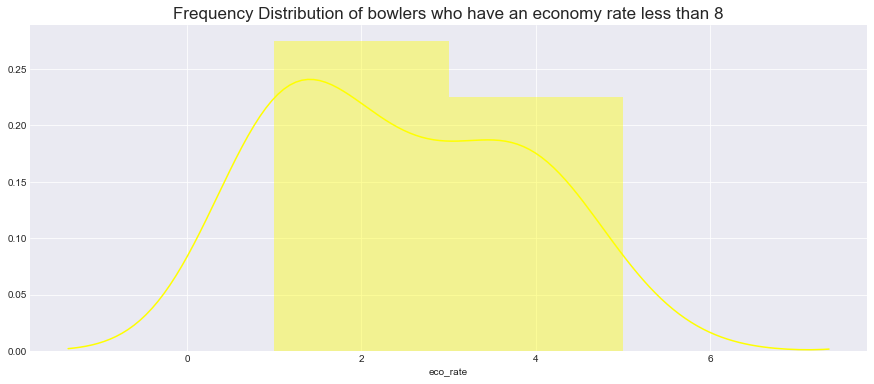

In [28]:
plt.figure(figsize=(15,6))
sns.distplot(eco_rate_count,color='yellow')
plt.title('Frequency Distribution of bowlers who have an economy rate less than 8',fontsize=17)

### As we can observe from the above there might be 1-4 such bowlers in the match.